In [7]:
import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold


In [57]:
pip install eli5

     |████████████████████████████████| 105 kB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [172]:
df2 = pd.read_csv("/Users/tamanna.urmi/ETA_at_checkout/dataset_with_domtopic_features_unimputed.csv")

In [173]:
y = df2[['actual_t2_second']]
X = df2.drop(['actual_t2_second', 'order_no',  'book_time', 'booking_date', 'merchant_id', 'driver_id', 'customer_id', 'service_area_id', 'ids_by_hour'], axis=1)

X.columns

Index(['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12',
       'topic13', 'topic14', 'topic15', 'topic16', 'topic17', 'topic18',
       'topic19', 'topic20', 'topic21', 'topic22', 'topic23', 'topic24',
       'topic25', 'topic26', 'topic27', 'topic28', 'topic29', 'topic30',
       'topic31', 'topic32', 'topic33', 'topic34', 'dominant_topic',
       'arrival_merchant_distance', 'mdominant_topic', 'omdominant_topic',
       'dominant_topic_order_cnt', 'dominant_topic_average_t2_second',
       'booking_hour', 'dist_to_merch', 'booking_day', 'is_weekend',
       'normalized_gmv', 'is_sku_promo_order', 'is_voucher_order',
       'demand_service_area_1w', 'avg_gmv_service_area_1w',
       'avg_t2_service_area_1w', 'demand_service_area_1d',
       'avg_gmv_service_area_1d', 'avg_t2_service_area_1d',
       'avg_t2_merchant_1m', 'is_merchant_in_poi', 'merchant_acceptance_flag',
       'merchant_auto_acc

In [174]:


#@title Train-test split
test_size = 0.2  #@param {type: "slider", min: 0, max: 1, step: 0.01}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_test


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,total_cuisine_cnt,primary_cuisine_demand_1d,avg_gmv_primary_cuisine_1d,avg_t2_primary_cuisine_1d,primary_cuisine_demand_1w,avg_gmv_primary_cuisine_1w,avg_t2_primary_cuisine_1w,classification0,classification1,classification2
1289827,0.005214,0.003815,0.047394,0.037635,0.000033,0.027136,0.000967,0.002226,0.000040,0.398630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,28.219427,59171.824893,593.979699,8.0,45875.000000,788.750000,0.0,0.0,1.0
828787,0.000014,0.000008,0.000012,0.000027,0.000026,0.000005,0.000013,0.000035,0.000030,0.000006,...,1.0,3.000000,25333.333333,144.000000,14.0,41535.714286,252.357143,0.0,0.0,1.0
257803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,28.219427,59171.824893,593.979699,54.0,29204.666667,178.092593,0.0,1.0,0.0
1184253,0.001136,0.003202,0.003455,0.022066,0.000039,0.128753,0.000019,0.000052,0.000046,0.020998,...,2.0,22.000000,59977.272727,361.181818,86.0,49709.302326,285.930233,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371570,0.000573,0.000333,0.000504,0.001127,0.001066,0.000189,0.000530,0.001451,0.339517,0.000270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,20.000000,48970.000000,378.800000,118.0,49020.338983,469.822034,0.0,1.0,0.0
981980,0.001134,0.000659,0.000998,0.002230,0.950162,0.000373,0.001048,0.002870,0.002504,0.000534,...,2.0,46.000000,117434.782609,645.217391,349.0,110859.598854,760.094556,1.0,0.0,0.0
817982,0.000064,0.000037,0.000057,0.000127,0.000120,0.000021,0.000059,0.000163,0.000142,0.000030,...,3.0,28.219427,59171.824893,593.979699,31.0,31967.741935,718.032258,0.0,0.0,1.0


In [182]:

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())
b_train = X_train[['avg_t2_merchant_1m']]
b_test = X_test[['avg_t2_merchant_1m']]


# Choose best n_estimators

In [3]:
params1 = {
        'n_estimators' : list(range(50,250,30)),    
        }

In [1]:
list(range(50,250,30))

[50, 80, 110, 140, 170, 200, 230]

In [5]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [13]:
# xgb_conf = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

xgb_conf = XGBRegressor(learning_rate=0.05, objective ='reg:squarederror', max_depth = 5, colsample_bytree = 0.8)


In [14]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)


In [16]:
grid = GridSearchCV(estimator=xgb_conf, param_grid=params1, scoring = 'neg_mean_absolute_error', \
                    n_jobs=4, cv=skf.split(X_train, y_train), verbose=3 )
grid.fit(X_train, y_train)
print('\n All results: ')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
results.to_csv('xgb-grid-search-results-01.csv', index=False)


/Users/tamanna.urmi/virtualenv/gojek_feast/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed: 123.3min finished



 All results: 
{'mean_fit_time': array([ 467.82751306,  705.1325043 ,  966.79634976, 1251.05305465,
       1537.55552204, 1970.15747635, 2012.61093163]), 'std_fit_time': array([  0.44876493,  19.92716589,  11.14428862,   4.23168575,
         0.7696772 ,  57.26473453, 248.2112478 ]), 'mean_score_time': array([3.43837976, 4.30462964, 4.93191433, 6.22144469, 6.55594563,
       8.97731098, 7.89481068]), 'std_score_time': array([0.34647608, 0.15063226, 0.13588764, 0.33781642, 0.08774718,
       1.0426365 , 3.01493905]), 'param_n_estimators': masked_array(data=[50, 80, 110, 140, 170, 200, 230],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50}, {'n_estimators': 80}, {'n_estimators': 110}, {'n_estimators': 140}, {'n_estimators': 170}, {'n_estimators': 200}, {'n_estimators': 230}], 'split0_test_score': array([-168.81978705, -158.95581861, -157.04276335, -155.90589549,
       -155.01890879, -15

# Choose best max_depth

In [18]:

param_grid = {
 'max_depth':[4, 5, 6],
 'learning_rate':[0.15],
 'colsample_bytree':[0.8],
 'subsample':[0.9],
 'objective':['reg:squarederror'],
 'n_estimators':[230]
}
xgb = XGBRegressor()
xgb_grid = GridSearchCV(xgb,param_grid, scoring = 'neg_mean_absolute_error', return_train_score=True)
xgb_grid.fit(X_train, y_train)
print("Best: %f using %s" % (xgb_grid.best_score_,
                             xgb_grid.best_params_,
                             xgb_grid.best_estimator_))
results.to_csv('xgb-grid-search-results-02.csv', index=False)

TypeError: not all arguments converted during string formatting

In [21]:
print('best score: ', xgb_grid.best_score_)
print('best params: ', xgb_grid.best_params_)
print('best estimator: ', xgb_grid.best_estimator_)

best score:  -151.72006508578767
best params:  {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 230, 'objective': 'reg:squarederror', 'subsample': 0.9}
best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=230, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)


# Choose best col_sample

In [24]:

param_grid3 = {
 'max_depth':[6],
 'learning_rate':[0.15],
 'colsample_bytree': [0.7],
 'subsample': [0.7],
 'objective':['reg:squarederror'],
 'n_estimators':[230]
}



xgb = XGBRegressor()
xgb_grid = GridSearchCV(xgb, param_grid3, scoring = 'neg_mean_absolute_error', return_train_score=True)
xgb_grid.fit(X_train, y_train)
print('Best score: ', xgb_grid.best_score_)
print('Best params: ', xgb_grid.best_params_)
print('Best estimator: ', xgb_grid.best_estimator_)
results.to_csv('xgb-grid-search-results-03.csv', index=False)

KeyboardInterrupt: 

In [46]:
xgb_conf = XGBRegressor(learning_rate=0.15, max_depth = 6, objective ='reg:squarederror', colsample_bytree = 0.7,
                subsample = 0.8, n_estimators = 300)

xgb = xgb_conf.fit(X_train, y_train)
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_predxgb = xgb.predict(X_test)
y_predxgb_df = pd.DataFrame(y_predxgb, index = y_test.index)
y_predxgb_df


,0
1289827,129.132278
1030819,325.551117
828787,46.964760
257803,184.280365
1184253,250.590775
...,...
1371570,1697.612305
1174649,346.996796
981980,513.818115
817982,529.889648


In [48]:
from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y_test, y_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y_test, b_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y_test, y_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y_test, b_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, b_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y_predxgb_df.values - y_test)/y_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b_test['avg_t2_merchant_1m'] - y_test['actual_t2_second'])/y_test['actual_t2_second']) * 100, '\n')



Model Mean Absolute Error: 151.9717625262269
Baseline metric Mean Absolute Error: 251.05620357595743 

Model Mean Squared Error: 64013.46859718382
Baseline metric Mean Squared Error: 128038.71570133706 

Model Root Mean Squared Error: 253.00883106560494
Baseline metric Root Mean Squared Error: 357.8249791467011 

Model Mean Absolute Percentage Error: actual_t2_second    40.813315
dtype: float64
Baseline metric Mean Absolute Percentage Error: 77.46465728050616 



# Feature importance

In [181]:
X_train.isnull().sum()

topic0                             0
topic1                             0
topic2                             0
topic3                             0
topic4                             0
                               ...  
avg_gmv_primary_cuisine_1w    214490
avg_t2_primary_cuisine_1w     214490
classification0               214490
classification1               214490
classification2               214490
Length: 86, dtype: int64

In [183]:
xgb_conf = XGBRegressor(learning_rate=0.02, max_depth = 8, objective ='reg:squarederror', colsample_bytree = 0.7,
                subsample = 0.8, n_estimators = 300)

xgb = xgb_conf.fit(X_train, y_train)
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:


y_predxgb = xgb.predict(X_test)
y_predxgb_df = pd.DataFrame(y_predxgb, index = y_test.index)
y_predxgb_df


,0
1289827,327.785614
1030819,338.869019
828787,61.448696
257803,173.584763
1184253,295.293823
...,...
1371570,2242.799072
1174649,381.968872
981980,610.365479
817982,597.989258


In [185]:


from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y_test, y_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y_test, b_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y_test, y_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y_test, b_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, b_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y_predxgb.values - y_test)/y_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b_test['avg_t2_merchant_1m'] - y_test['actual_t2_second'])/y_test['actual_t2_second']) * 100, '\n')



Model Mean Absolute Error: 188.0476000725757
Baseline metric Mean Absolute Error: 251.0563660160959 

Model Mean Squared Error: 81940.17015465697
Baseline metric Mean Squared Error: 128038.72854533345 

Model Root Mean Squared Error: 286.25193476142124
Baseline metric Root Mean Squared Error: 357.82499709401725 

Model Mean Absolute Percentage Error: actual_t2_second    54.165968
dtype: float64
Baseline metric Mean Absolute Percentage Error: 77.46495548023238 



In [175]:
import eli5
from eli5.sklearn import PermutationImportance

In [55]:
X_train.shape

(1170564, 87)

In [186]:
perm = PermutationImportance(xgb_conf, random_state=1).fit(X_test, y_test)


In [77]:
perm

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.7, gamma=0,
                                             gpu_id=-1, importance_type='gain',
                                             interaction_constraints='',
                                             learning_rate=0.15,
                                             max_delta_step=0, max_depth=6,
                                             min_child_weight=1, missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=500, n_jobs=0,
                                             num_parallel_tree=1,
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1

In [187]:
a = eli5.show_weights(perm, feature_names = X_test.columns.tolist())
a

Weight,Feature
0.8639 ± 0.0039,dominant_topic_average_t2_second
0.1247 ± 0.0010,normalized_gmv
0.0148 ± 0.0003,avg_t2_merchant_1m
0.0147 ± 0.0001,avg_gmv_merchant_1w
0.0104 ± 0.0004,dominant_topic_order_cnt
0.0085 ± 0.0003,avg_t2_merchant_3h
0.0062 ± 0.0002,avg_t2_same_hour_merchant_1m
0.0036 ± 0.0001,arrival_merchant_distance
0.0034 ± 0.0003,avg_gmv_primary_cuisine_1w
0.0032 ± 0.0002,dist_to_merch


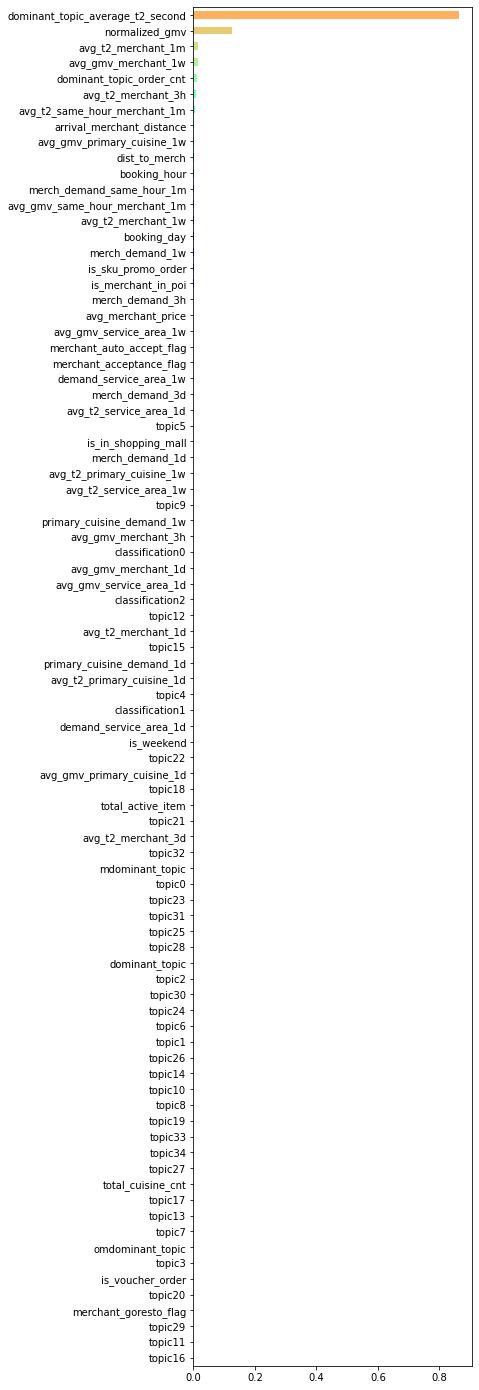

In [188]:
import random
from matplotlib.pyplot import cm
import numpy as np

plt.figure(figsize=(5,25))
importances = pd.Series(perm.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [203]:
pd.DataFrame(perm.feature_importances_, X_train.columns).to_csv("/Users/tamanna.urmi/ETA_at_checkout/feature_importance01.csv", index = True)

In [192]:
importances.sort_values(ascending=False)[0:15].index

Index(['dominant_topic_average_t2_second', 'normalized_gmv',
       'avg_t2_merchant_1m', 'avg_gmv_merchant_1w', 'dominant_topic_order_cnt',
       'avg_t2_merchant_3h', 'avg_t2_same_hour_merchant_1m',
       'arrival_merchant_distance', 'avg_gmv_primary_cuisine_1w',
       'dist_to_merch', 'booking_hour', 'merch_demand_same_hour_1m',
       'avg_gmv_same_hour_merchant_1m', 'avg_t2_merchant_1w', 'booking_day'],
      dtype='object')

In [85]:
importances

topic0                        0.000459
topic1                        0.000053
topic2                        0.000243
topic3                        0.000010
topic4                        0.000033
                                ...   
avg_gmv_primary_cuisine_1w    0.002212
avg_t2_primary_cuisine_1w     0.000240
classification0               0.000117
classification1               0.000050
classification2               0.000193
Length: 87, dtype: float64

# Features scaled and data sampled

In [194]:
df_random = df2.sample(800000, random_state=102)
df_random

,order_no,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,total_cuisine_cnt,primary_cuisine_demand_1d,avg_gmv_primary_cuisine_1d,avg_t2_primary_cuisine_1d,primary_cuisine_demand_1w,avg_gmv_primary_cuisine_1w,avg_t2_primary_cuisine_1w,classification0,classification1,classification2
827656,F-911890446,0.000014,0.000008,0.000012,0.000027,0.000026,0.000005,0.000013,0.000035,0.000030,...,2.0,3.000000,26333.333333,179.000000,17.0,24176.470588,235.705882,0.0,0.0,1.0
923683,F-914349472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,8.000000,47250.000000,367.375000,97.0,50422.680412,445.670103,0.0,1.0,0.0
1079748,F-918417275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,150.000000,68186.666667,803.633333,1123.0,74120.213713,1001.313446,1.0,0.0,0.0
543233,F-904356012,0.010913,0.006348,0.009603,0.021467,0.020292,0.003594,0.010092,0.027628,0.024106,...,1.0,28.219427,59171.824893,593.979699,1.0,29500.000000,673.000000,0.0,0.0,1.0
183764,F-894900221,0.000359,0.555622,0.000316,0.000705,0.000667,0.000763,0.000332,0.000908,0.000792,...,3.0,28.219427,59171.824893,593.979699,8.0,53750.000000,603.250000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694760,F-908395487,0.329779,0.000267,0.000405,0.000904,0.000855,0.000151,0.000425,0.001164,0.001016,...,2.0,10.000000,26830.000000,306.100000,57.0,29480.701754,430.298246,0.0,0.0,0.0
1199024,F-921515405,0.000022,0.187967,0.005375,0.000044,0.000042,0.005400,0.001971,0.000057,0.000050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300490,F-897958671,0.010623,0.000080,0.000121,0.000271,0.194846,0.000682,0.072580,0.000349,0.000305,...,3.0,9.000000,27444.444444,622.000000,49.0,38040.816327,594.265306,0.0,1.0,0.0
417116,F-901044977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,1.000000,12500.000000,147.000000,28.0,26464.285714,601.285714,0.0,0.0,1.0


In [195]:
y2 = df_random[['actual_t2_second']]
X2 = df_random.drop(['actual_t2_second', 'order_no',  'book_time', 'booking_date', 'merchant_id', 'driver_id', 'customer_id', 'service_area_id', 'ids_by_hour'], axis=1)
X2_imp = X2[['dominant_topic_average_t2_second', 'normalized_gmv',
       'avg_t2_merchant_1m', 'avg_gmv_merchant_1w', 'dominant_topic_order_cnt',
       'avg_t2_merchant_3h']]
X2_imp

,dominant_topic_average_t2_second,normalized_gmv,avg_t2_merchant_1m,avg_gmv_merchant_1w,dominant_topic_order_cnt,avg_t2_merchant_3h
827656,96.500000,80000.0,153.155556,24176.470588,2,NaN
923683,543.947368,30000.0,575.008631,50422.680412,19,711.666667
1079748,1032.022727,38500.0,995.213643,74120.213713,88,1173.275862
543233,743.333333,45000.0,792.336842,29500.000000,3,1120.000000
183764,659.500000,62000.0,614.813665,53750.000000,4,542.000000
...,...,...,...,...,...,...
694760,235.000000,43000.0,384.647590,29480.701754,1,210.000000
1199024,422.000000,48000.0,160.136364,NaN,1,NaN
300490,734.000000,63000.0,646.651064,38040.816327,2,817.000000
417116,257.750000,12500.0,232.533784,26464.285714,4,NaN


In [197]:

#@title Train-test split
test_size = 0.2  #@param {type: "slider", min: 0, max: 1, step: 0.01}

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_imp, y2, test_size=test_size, random_state=42)
X2_test

,dominant_topic_average_t2_second,normalized_gmv,avg_t2_merchant_1m,avg_gmv_merchant_1w,dominant_topic_order_cnt,avg_t2_merchant_3h
706185,344.666667,24000.0,447.709369,35066.964286,15,50.000000
688160,689.875000,51000.0,773.498832,77377.824488,120,376.000000
1354468,459.400000,36000.0,428.380952,NaN,10,NaN
1032350,455.000000,69500.0,472.009608,89206.572770,48,NaN
1358526,121.200000,55000.0,173.318841,NaN,5,NaN
...,...,...,...,...,...,...
871252,636.166667,50000.0,407.707621,44307.055215,6,396.357143
941541,812.000000,40000.0,1015.047809,33545.238095,1,246.000000
424896,1968.600000,37500.0,1564.853420,64944.423077,5,NaN
1174813,723.250000,49000.0,917.041667,63134.831461,8,865.500000


In [198]:

X2_train = X2_train.fillna(X2_train.mean())
X2_test = X2_test.fillna(X2_train.mean())
y2_train = y2_train.fillna(y2_train.mean())
y2_test = y2_test.fillna(y2_train.mean())
b2_train = X2_train[['avg_t2_merchant_1m']]
b2_test = X2_test[['avg_t2_merchant_1m']]


In [216]:
X2_train

,dominant_topic_average_t2_second,normalized_gmv,avg_t2_merchant_1m,avg_gmv_merchant_1w,dominant_topic_order_cnt,avg_t2_merchant_3h
390286,524.794118,52000.0,580.847675,97703.092784,102,564.961538
422600,330.000000,50000.0,305.023748,60722.222222,50,373.000000
565050,1908.000000,39600.0,1260.857143,38455.882353,1,587.242384
1070282,1181.789116,246000.0,1262.464715,115497.667185,147,1415.894737
892273,300.750000,14500.0,356.776119,32688.888889,4,587.242384
...,...,...,...,...,...,...
860078,697.106383,75000.0,694.859733,76087.182448,94,465.250000
598523,584.933333,59000.0,609.641429,60441.463415,30,1063.055556
471038,524.750000,20000.0,546.235294,26250.000000,4,587.242384
959745,465.000000,34000.0,518.256410,35000.000000,3,587.242384


In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X2_scaling = scaler.fit(X2_train)
X2_train_scaled = pd.DataFrame(X2_scaling.transform(X2_train), columns =X2_train.columns)
X2_test_scaled = pd.DataFrame(X2_scaling.transform(X2_test), columns = X2_test.columns)


y2_scaling = scaler.fit(y2_train)
y2_train_scaled = pd.DataFrame(y2_scaling.transform(y2_train), columns = y2_train.columns)
y2_test_scaled = pd.DataFrame(y2_scaling.transform(y2_test), columns = y2_test.columns)



b2_train_scaled = X2_train_scaled[['avg_t2_merchant_1m']]
b2_test_scaled = X2_test_scaled[['avg_t2_merchant_1m']]


In [235]:
from sklearn.preprocessing import MaxAbsScaler

scalerMAS = MaxAbsScaler()

X2_MASscaling = scalerMAS.fit(X2_train)
X2_train_MASscaled = pd.DataFrame(X2_MASscaling.transform(X2_train), columns =X2_train.columns)
X2_test_MASscaled = pd.DataFrame(X2_MASscaling.transform(X2_test), columns = X2_test.columns)


y2_MASscaling = scalerMAS.fit(y2_train)
y2_train_MASscaled = pd.DataFrame(y2_MASscaling.transform(y2_train), columns = y2_train.columns)
y2_test_MASscaled = pd.DataFrame(y2_MASscaling.transform(y2_test), columns = y2_test.columns)



b2_train_MASscaled = X2_train_MASscaled[['avg_t2_merchant_1m']]
b2_test_MASscaled = X2_test_MASscaled[['avg_t2_merchant_1m']]

In [217]:
X2_train_scaled

,dominant_topic_average_t2_second,normalized_gmv,avg_t2_merchant_1m,avg_gmv_merchant_1w,dominant_topic_order_cnt,avg_t2_merchant_3h
0,-0.143155,-0.089028,0.021135,1.443678,1.800302,-3.087011e-02
1,-0.696081,-0.127495,-0.847664,0.151397,0.654613,-2.968328e-01
2,3.783099,-0.327522,2.163051,-0.626691,-0.424979,6.300525e-16
3,1.721737,3.642244,2.168115,2.065502,2.791764,1.148098e+00
4,-0.779108,-0.810279,-0.684652,-0.828216,-0.358882,6.300525e-16
...,...,...,...,...,...,...
639995,0.345956,0.353339,0.380254,0.688320,1.624042,-1.690205e-01
639996,0.027551,0.045606,0.111831,0.141586,0.213963,6.592392e-01
639997,-0.143280,-0.704495,-0.087888,-1.053220,-0.358882,6.300525e-16
639998,-0.312882,-0.435228,-0.176017,-0.747455,-0.380914,6.300525e-16


<AxesSubplot:xlabel='avg_t2_merchant_3h'>

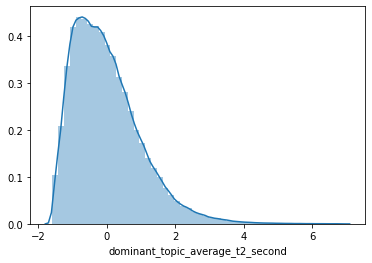

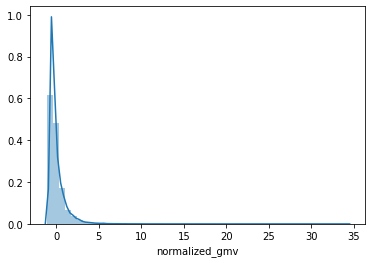

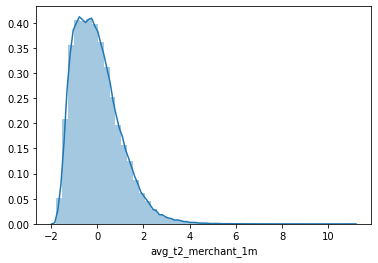

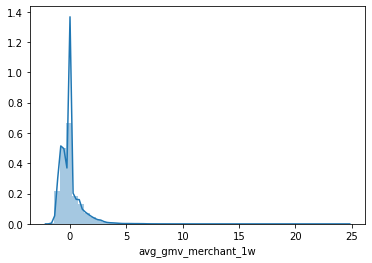

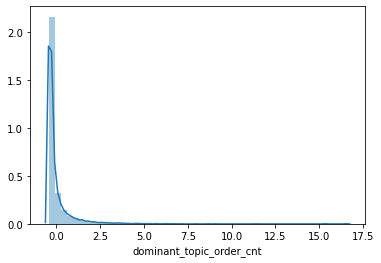

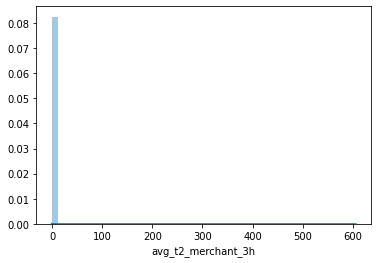

In [221]:
plt.figure(1)
sns.distplot(X2_train_scaled.iloc[:, 0])
plt.figure(2)
sns.distplot(X2_train_scaled.iloc[:, 1])
plt.figure(3)
sns.distplot(X2_train_scaled.iloc[:, 2])
plt.figure(4)
sns.distplot(X2_train_scaled.iloc[:, 3])
plt.figure(5)
sns.distplot(X2_train_scaled.iloc[:, 4])
plt.figure(6)
sns.distplot(X2_train_scaled.iloc[:, 5])

In [224]:
X2_train_MASscaled

,dominant_topic_average_t2_second,normalized_gmv,avg_t2_merchant_1m,avg_gmv_merchant_1w,dominant_topic_order_cnt,avg_t2_merchant_3h
0,0.174990,0.028261,0.143018,0.128450,0.132296,0.001290
1,0.110037,0.027174,0.075104,0.079831,0.064851,0.000852
2,0.636212,0.021522,0.310453,0.050558,0.001297,0.001341
3,0.394061,0.133696,0.310849,0.151844,0.190661,0.003233
4,0.100283,0.007880,0.087847,0.042976,0.005188,0.001341
...,...,...,...,...,...,...
639995,0.232446,0.040761,0.171091,0.100031,0.121920,0.001062
639996,0.195043,0.032065,0.150108,0.079462,0.038911,0.002428
639997,0.174975,0.010870,0.134496,0.034511,0.005188,0.001341
639998,0.155052,0.018478,0.127607,0.046014,0.003891,0.001341


<AxesSubplot:xlabel='avg_t2_merchant_3h'>

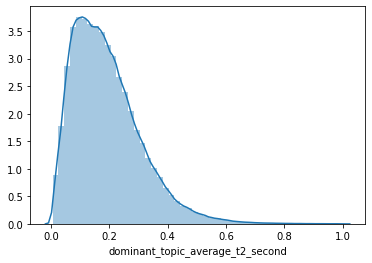

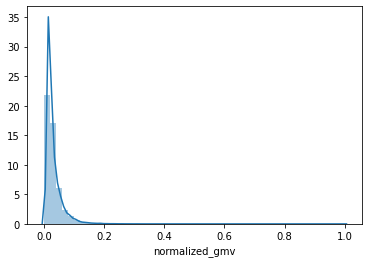

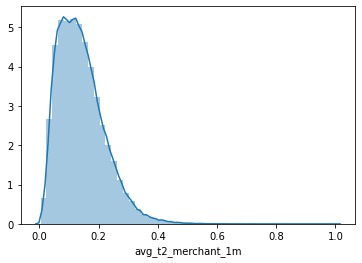

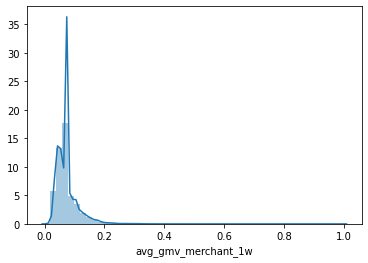

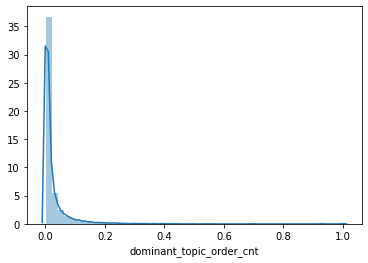

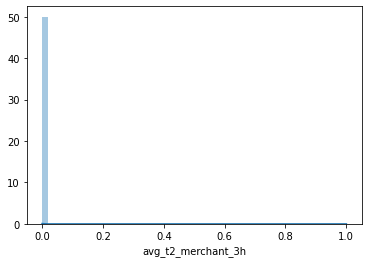

In [225]:
plt.figure(1)
sns.distplot(X2_train_MASscaled.iloc[:, 0])
plt.figure(2)
sns.distplot(X2_train_MASscaled.iloc[:, 1])
plt.figure(3)
sns.distplot(X2_train_MASscaled.iloc[:, 2])
plt.figure(4)
sns.distplot(X2_train_MASscaled.iloc[:, 3])
plt.figure(5)
sns.distplot(X2_train_MASscaled.iloc[:, 4])
plt.figure(6)
sns.distplot(X2_train_MASscaled.iloc[:, 5])

In [200]:
xgb3 = XGBRegressor(learning_rate=0.05, max_depth = 10, objective ='reg:squarederror', colsample_bytree = 0.7,
                subsample = 0.8, n_estimators = 400, gamma = 0.2)

xgb = xgb3.fit(X2_train_scaled, y2_train_scaled)


y2_predxgb_scaled = xgb.predict(X2_test_scaled)

y2_predxgb = y2_scaling.inverse_transform(y2_predxgb_scaled)
y2_predxgb_scaled_df = pd.DataFrame(y2_predxgb_scaled, index = y2_test_scaled.index)
y2_predxgb_df = pd.DataFrame(y2_predxgb, index = y2_test.index)


In [206]:
## Scaled y_test and y_pred

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test_scaled, b2_test_scaled), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test_scaled, b2_test_scaled), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, y2_predxgb_scaled)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, b2_test_scaled)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_scaled_df.values - y2_test_scaled.values)/y2_test_scaled.values) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test_scaled - y2_test_scaled.values)/y2_test_scaled.values) * 100)



Model Mean Absolute Error: 0.4061991133195179
Baseline metric Mean Absolute Error: 0.6100754607885014 

Model Mean Squared Error: 0.38663674995198044
Baseline metric Mean Squared Error: 0.705726489448161 

Model Root Mean Squared Error: 0.6218012141769912
Baseline metric Root Mean Squared Error: 0.8400752879642163 

Model Mean Absolute Percentage Error: -44.68094224484423
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m   -40.996994
dtype: float64


In [202]:
## Inverse scaled y_test and y_pred (original scale)

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test, y2_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test, b2_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test, y2_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test, b2_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, b2_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_df.values - y2_test)/y2_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test - y2_test.values)/y2_test.values) * 100)



Model Mean Absolute Error: 189.9952174388662
Baseline metric Mean Absolute Error: 250.40762673031543 

Model Mean Squared Error: 84588.34526696905
Baseline metric Mean Squared Error: 127181.09981122546 

Model Root Mean Squared Error: 290.8407558561369
Baseline metric Root Mean Squared Error: 356.62459226927336 

Model Mean Absolute Percentage Error: actual_t2_second    54.768848
dtype: float64
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m    77.870939
dtype: float64


In [213]:
xgb4 = XGBRegressor(learning_rate=0.02, max_depth = 10, objective ='reg:squarederror', colsample_bytree = 0.7,
                subsample = 0.8, n_estimators = 400, gamma = 0, alpha = 10, n_thread = 1)

xgb4 = xgb3.fit(X2_train_scaled, y2_train_scaled)


y4_predxgb_scaled = xgb4.predict(X2_test_scaled)
y4_predxgb = y2_scaling.inverse_transform(y4_predxgb_scaled)
y4_predxgb_scaled_df = pd.DataFrame(y4_predxgb_scaled, index = y2_test_scaled.index)
y4_predxgb_df = pd.DataFrame(y4_predxgb, index = y2_test.index)


In [214]:
## Scaled y_test and y_pred

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test_scaled, b2_test_scaled), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test_scaled, b2_test_scaled), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, y2_predxgb_scaled)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, b2_test_scaled)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_scaled_df.values - y2_test_scaled.values)/y2_test_scaled.values) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test_scaled - y2_test_scaled.values)/y2_test_scaled.values) * 100)



Model Mean Absolute Error: 0.4061991133195179
Baseline metric Mean Absolute Error: 0.6100754607885014 

Model Mean Squared Error: 0.38663674995198044
Baseline metric Mean Squared Error: 0.705726489448161 

Model Root Mean Squared Error: 0.6218012141769912
Baseline metric Root Mean Squared Error: 0.8400752879642163 

Model Mean Absolute Percentage Error: -44.68094224484423
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m   -40.996994
dtype: float64


In [215]:
## Inverse scaled y_test and y_pred (original scale)

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test, y2_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test, b2_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test, y2_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test, b2_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, b2_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_df.values - y2_test)/y2_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test - y2_test.values)/y2_test.values) * 100)



Model Mean Absolute Error: 189.9952174388662
Baseline metric Mean Absolute Error: 250.40762673031543 

Model Mean Squared Error: 84588.34526696905
Baseline metric Mean Squared Error: 127181.09981122546 

Model Root Mean Squared Error: 290.8407558561369
Baseline metric Root Mean Squared Error: 356.62459226927336 

Model Mean Absolute Percentage Error: actual_t2_second    54.768848
dtype: float64
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m    77.870939
dtype: float64


In [213]:
xgb4 = XGBRegressor(learning_rate=0.02, objective ='reg:squarederror', max_depth = 6, \
                    colsample_bytree = 0.8,  nthread=1, alpha = 10, n_estimators = 200)

xgb4 = xgb3.fit(X2_train_scaled, y2_train_scaled)


y4_predxgb_scaled = xgb4.predict(X2_test_scaled)
y4_predxgb = y2_scaling.inverse_transform(y4_predxgb_scaled)
y4_predxgb_scaled_df = pd.DataFrame(y4_predxgb_scaled, index = y2_test_scaled.index)
y4_predxgb_df = pd.DataFrame(y4_predxgb, index = y2_test.index)


In [214]:
## Scaled y_test and y_pred

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test_scaled, b2_test_scaled), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test_scaled, b2_test_scaled), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, y2_predxgb_scaled)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, b2_test_scaled)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_scaled_df.values - y2_test_scaled.values)/y2_test_scaled.values) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test_scaled - y2_test_scaled.values)/y2_test_scaled.values) * 100)



Model Mean Absolute Error: 0.4061991133195179
Baseline metric Mean Absolute Error: 0.6100754607885014 

Model Mean Squared Error: 0.38663674995198044
Baseline metric Mean Squared Error: 0.705726489448161 

Model Root Mean Squared Error: 0.6218012141769912
Baseline metric Root Mean Squared Error: 0.8400752879642163 

Model Mean Absolute Percentage Error: -44.68094224484423
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m   -40.996994
dtype: float64


In [215]:
## Inverse scaled y_test and y_pred (original scale)

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test, y2_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test, b2_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test, y2_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test, b2_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, b2_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_df.values - y2_test)/y2_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test - y2_test.values)/y2_test.values) * 100)



Model Mean Absolute Error: 189.9952174388662
Baseline metric Mean Absolute Error: 250.40762673031543 

Model Mean Squared Error: 84588.34526696905
Baseline metric Mean Squared Error: 127181.09981122546 

Model Root Mean Squared Error: 290.8407558561369
Baseline metric Root Mean Squared Error: 356.62459226927336 

Model Mean Absolute Percentage Error: actual_t2_second    54.768848
dtype: float64
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m    77.870939
dtype: float64


In [226]:
xgb6 = XGBRegressor(learning_rate=0.02, max_depth = 6, objective ='reg:squarederror', colsample_bytree = 0.8,
                 n_estimators = 200, alpha = 10)

xgb6 = xgb6.fit(X2_train_MASscaled, y2_train_MASscaled)


y2_predxgb_MASscaled = xgb6.predict(X2_test_MASscaled).reshape(-1,1)
y2_predxgb = y2_MASscaling.inverse_transform(y2_predxgb_MASscaled)
y2_predxgb_MASscaled_df = pd.DataFrame(y2_predxgb_MASscaled, index = y2_test_MASscaled.index)
y2_predxgb_df = pd.DataFrame(y2_predxgb, index = y2_test.index)


In [232]:
y2_predxgb_MASscaled.shape

(160000, 1)

In [214]:
## Scaled y_test and y_pred

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test_scaled, b2_test_scaled), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test_scaled, y2_predxgb_scaled))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test_scaled, b2_test_scaled), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, y2_predxgb_scaled)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test_scaled, b2_test_scaled)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_scaled_df.values - y2_test_scaled.values)/y2_test_scaled.values) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test_scaled - y2_test_scaled.values)/y2_test_scaled.values) * 100)



Model Mean Absolute Error: 0.4061991133195179
Baseline metric Mean Absolute Error: 0.6100754607885014 

Model Mean Squared Error: 0.38663674995198044
Baseline metric Mean Squared Error: 0.705726489448161 

Model Root Mean Squared Error: 0.6218012141769912
Baseline metric Root Mean Squared Error: 0.8400752879642163 

Model Mean Absolute Percentage Error: -44.68094224484423
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m   -40.996994
dtype: float64


In [234]:
## Inverse scaled y_test and y_pred (original scale)

from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test, y2_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test, b2_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test, y2_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test, b2_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, b2_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_df.values - y2_test)/y2_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test - y2_test.values)/y2_test.values) * 100)



Model Mean Absolute Error: 199.54718011569977
Baseline metric Mean Absolute Error: 250.40762673031543 

Model Mean Squared Error: 86637.76746623025
Baseline metric Mean Squared Error: 127181.09981122546 

Model Root Mean Squared Error: 294.34294193377605
Baseline metric Root Mean Squared Error: 356.62459226927336 

Model Mean Absolute Percentage Error: actual_t2_second    67.834755
dtype: float64
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m    77.870939
dtype: float64


In [239]:
xgb7 = XGBRegressor(learning_rate=0.02, objective ='reg:squarederror', max_depth = 6, colsample_bytree = 0.8,\
                    nthread=1, alpha = 10, n_estimators = 200)

xgb7 = xgb7.fit(X2_train, y2_train)


y2_predxgb7 = xgb7.predict(X2_test)
y2_predxgb7_df = pd.DataFrame(y2_predxgb7, index = y2_test.index)



In [240]:
y2_predxgb7 = y2_predxgb

In [241]:


from sklearn.metrics import mean_absolute_error
print('Model Mean Absolute Error:', mean_absolute_error(y2_test, y2_predxgb))
print('Baseline metric Mean Absolute Error:', mean_absolute_error(y2_test, b2_test), '\n')

from sklearn.metrics import mean_squared_error
print('Model Mean Squared Error:', mean_squared_error(y2_test, y2_predxgb))
print('Baseline metric Mean Squared Error:', mean_squared_error(y2_test, b2_test), '\n')

print('Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_predxgb)))
print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, b2_test)), '\n')

print('Model Mean Absolute Percentage Error:', np.mean((y2_predxgb_df.values - y2_test)/y2_test) * 100)
print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test - y2_test.values)/y2_test.values) * 100)



Model Mean Absolute Error: 199.54718011569977
Baseline metric Mean Absolute Error: 250.40762673031543 

Model Mean Squared Error: 86637.76746623025
Baseline metric Mean Squared Error: 127181.09981122546 

Model Root Mean Squared Error: 294.34294193377605
Baseline metric Root Mean Squared Error: 356.62459226927336 

Model Mean Absolute Percentage Error: actual_t2_second    67.834755
dtype: float64
Baseline metric Mean Absolute Percentage Error: avg_t2_merchant_1m    77.870939
dtype: float64


In [159]:
np.mean((b2_test_scaled - y2_test_scaled.values)/y2_test_scaled.values) * 100

avg_t2_merchant_1m   -40.997388
dtype: float64

# Random search cv

In [212]:
## Random search 1

param_grid5 = {
  'n_estimators': [500], 
    'max_depth': [8, 10],
    'learning_rate': [0.02], 
    'gamma': [0],
    'alpha': 
}



xgb = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid5, n_iter = 15, cv = 3, \
                                scoring = 'neg_mean_absolute_error', return_train_score=True, random_state = 100)
xgb_random.fit(X2_train_scaled, y2_train_scaled)
print('Best score: ', xgb_random.best_score_)
print('Best params: ', xgb_random.best_params_)
print('Best estimator: ', xgb_random.best_estimator_)
results.to_csv('xgb-random-search-results-05.csv', index=False)

# RandomizedSearchCV(estimator = baseModel, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=0, random_state=100 , n_jobs = -1)


Best score:  -0.403596676554072
Best params:  {'n_estimators': 360, 'max_depth': 8, 'learning_rate': 0.02, 'gamma': 0.2}
Best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [ ]:
## Random search 2

param_grid4 = {
  'n_estimators': [120, 200, 300], 
    'max_depth': [8],
    'learning_rate': [0.15], 
    'gamma': [0.2]
}



xgb = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid4, n_iter = 15, cv = 3, \
                                scoring = 'neg_mean_absolute_error', return_train_score=True, random_state = 100)
xgb_random.fit(X2_train_scaled, y2_train_scaled)
print('Best score: ', xgb_random.best_score_)
print('Best params: ', xgb_random.best_params_)
print('Best estimator: ', xgb_random.best_estimator_)
results.to_csv('xgb-random-search-results-01.csv', index=False)

In [127]:
sql01 = '''
SELECT predict_t2_second, actual_t2_second 
FROM `bi-gojek.access_commerce.fd_tensoba_eval` 
WHERE DATE(_PARTITIONTIME) between "2020-09-01" AND "2020-09-15"
LIMIT 4000000
'''

current_model = pandas_gbq.read_gbq(sql01,project_id='data-gojek-access',dialect='standard')
current_model







Downloading:   0%|          | 0/4000000 [00:00<?, ?rows/s]


Downloading:  17%|█▋        | 662126/4000000 [00:20<01:41, 32754.05rows/s]


Downloading:  17%|█▋        | 662126/4000000 [00:33<01:41, 32754.05rows/s]


Downloading:  33%|███▎      | 1324185/4000000 [00:44<01:26, 30882.96rows/s]


Downloading:  33%|███▎      | 1324185/4000000 [01:04<01:26, 30882.96rows/s]


Downloading:  50%|████▉     | 1986263/4000000 [01:06<01:05, 30662.08rows/s]


Downloading:  50%|████▉     | 1986263/4000000 [01:25<01:05, 30662.08rows/s]


Downloading:  66%|██████▌   | 2648184/4000000 [01:27<00:43, 30832.84rows/s]


Downloading:  66%|██████▌   | 2648184/4000000 [01:47<00:43, 30832.84rows/s]


Downloading:  83%|████████▎ | 3310099/4000000 [01:49<00:22, 30806.46rows/s]


Downloading:  83%|████████▎ | 3310099/4000000 [02:07<00:22, 30806.46rows/s]


Downloading:  99%|█████████▉| 3971831/4000000 [02:15<00:00, 28999.39rows/s]


Downloading: 100%|██████████| 4000000/4000000 [02:18<00:00, 28955.56rows/s]


,predict_t2_second,actual_t2_second
0,702.813599,413.0
1,1067.315918,771.0
2,530.313599,218.0
3,924.513245,1134.0
4,461.528564,353.0
...,...,...
3999995,313.697266,60.0
3999996,411.496826,140.0
3999997,262.141357,144.0
3999998,336.230194,128.0


In [170]:
current_model = current_model.dropna()
cm_actualt2 = current_model.actual_t2_second.values
cm_predt2 = current_model.predict_t2_second.values
cm_predt2

array([ 702.81359863, 1067.31591797,  530.31359863, ...,  262.14135742,
        336.23019409,  321.10101318])

In [171]:
from sklearn.metrics import mean_absolute_error
print('Current Model Mean Absolute Error:', mean_absolute_error(cm_actualt2, cm_predt2))
# print('Baseline metric Mean Absolute Error:', mean_absolute_error(cm_predt2, b2_test), '\n')

from sklearn.metrics import mean_squared_error
print('Current Model Mean Squared Error:', mean_squared_error(cm_actualt2, cm_predt2))
# print('Baseline metric Mean Squared Error:', mean_squared_error(cm_predt2, b2_test), '\n')

print('Current Model Root Mean Squared Error:', np.sqrt(mean_squared_error(cm_actualt2, cm_predt2)))
# print('Baseline metric Root Mean Squared Error:', np.sqrt(mean_squared_error(cm_predt2, b2_test)), '\n')

print('Current Model Mean Absolute Percentage Error:', np.mean((cm_predt2 - cm_actualt2)/cm_actualt2) * 100)
# print('Baseline metric Mean Absolute Percentage Error:', np.mean((b2_test_scaled - y2_test_scaled)/y2_test_scaled) * 100, '\n')



Current Model Mean Absolute Error: 293.4668757789613
Current Model Mean Squared Error: 288513.89346888417
Current Model Root Mean Squared Error: 537.1348931775743
Current Model Mean Absolute Percentage Error: 54.46698803127538


In [242]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def mape(y_true, y_pred):
  return np.mean(abs(y_pred - y_true)/(y_true))

print("MAE : ", mean_absolute_error(Y_true, Y_pred))
print("MSE : ", mean_squared_error(Y_true, Y_pred))
print("R2 : ", r2_score(Y_true, Y_pred))
print("RMSE : ", mean_squared_error(Y_true, Y_pred, squared=False))
print("MAPE : ", mape(Y_true, Y_pred))

NameError: name 'Y_true' is not defined